In [5]:
import numpy as np
from matplotlib import pyplot as plt

In [6]:
# tworzymy tablice o wymiarach 128x128x3 (3 kanaly to RGB)
# uzupelnioną zerami = kolor czarny
data = np.zeros((128, 128, 3), dtype=np.uint8)


# chcemy zeby obrazek byl czarnobialy,
# wiec wszystkie trzy kanaly rgb uzupelniamy tymi samymi liczbami
# napiszmy do tego funkcje
def draw(img, x, y, color):
    img[x, y] = [color, color, color]

In [7]:
# zamalowanie 4 pikseli w lewym górnym rogu
draw(data, 5, 5, 100)
draw(data, 6, 6, 100)
draw(data, 5, 6, 255)
draw(data, 6, 5, 255)


# rysowanie kilku figur na obrazku
for i in range(128):
    for j in range(128):
        if (i-64)**2 + (j-64)**2 < 900:
            draw(data, i, j, 200)
        elif i > 100 and j > 100:
            draw(data, i, j, 255)
        elif (i-15)**2 + (j-110)**2 < 25:
            draw(data, i, j, 150)
        elif (i-15)**2 + (j-110)**2 == 25 or (i-15)**2 + (j-110)**2 == 26:
            draw(data, i, j, 255)

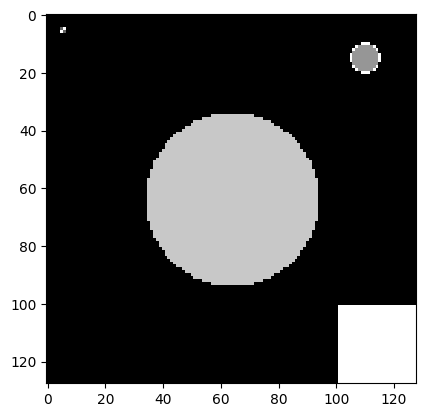

In [8]:
# konwersja macierzy na obrazek i wyświetlenie
plt.imshow(data, interpolation='nearest')
plt.show()

In [9]:
def copy(data):
    new_data = np.zeros((128, 128, 3), dtype=np.uint8)
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            new_data[i, j] = data[i, j]
    return new_data

def filter_fragment(data, filter):
    result = 0
    for i in range(filter.shape[0]):
        for j in range(filter.shape[1]):
            result += data[i, j] * filter[i, j]
    return result

def apply_filter(data, filter, s):
    new_data = []
    data_height = data.shape[0]
    data_width = data.shape[1]
    filter_height = filter.shape[0]
    filter_width = filter.shape[1]
    for i in range(1+(data_height-filter_height)//s):
        new_row = []
        for j in range(1+(data_width-filter_width)//s):
            filtered_value = filter_fragment(data[i*s:i*s+filter_height, j*s:j*s+filter_width], filter)
            new_row.append(filtered_value)
        new_data.append(np.array(new_row))
    return np.array(new_data)

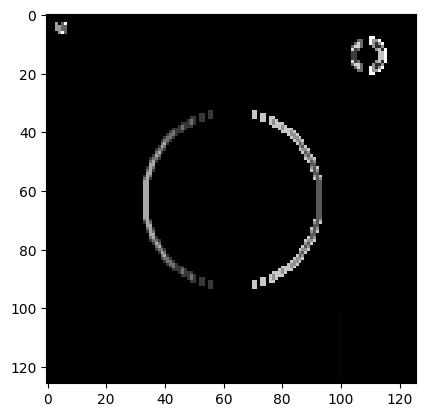

In [10]:
filter = np.array([[1,0,-1],[1,0,-1],[1,0,-1]], dtype=np.uint8)

filtered_data = apply_filter(copy(data), filter,1)

plt.imshow(filtered_data, interpolation='nearest')
plt.show()

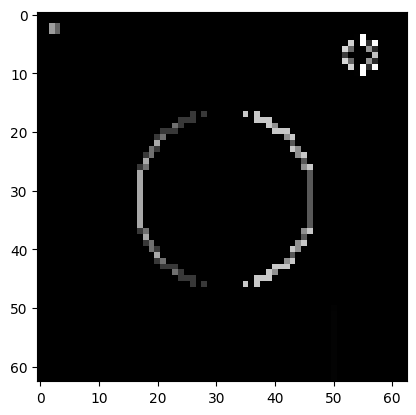

In [11]:
filter = np.array([[1,0,-1],[1,0,-1],[1,0,-1]], dtype=np.uint8)

filtered_data = apply_filter(copy(data), filter, 2)

plt.imshow(filtered_data, interpolation='nearest')
plt.show()

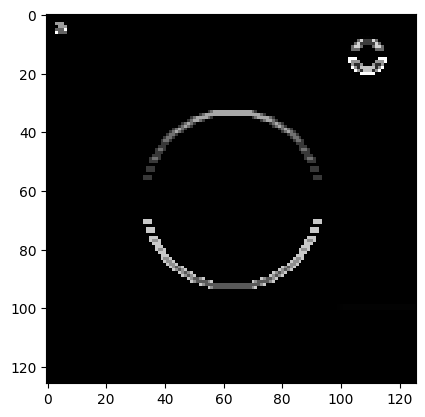

In [12]:
filter = np.array([[1,1,1],[0,0,0],[-1,-1,-1]], dtype=np.uint8)

filtered_data = apply_filter(copy(data), filter, 1)

plt.imshow(filtered_data, interpolation='nearest')
plt.show()

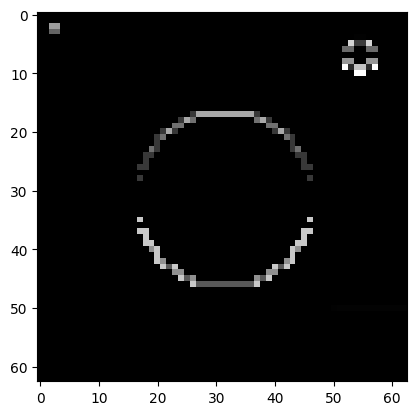

In [13]:
filter = np.array([[1,1,1],[0,0,0],[-1,-1,-1]], dtype=np.uint8)

filtered_data = apply_filter(copy(data), filter, 2)

plt.imshow(filtered_data, interpolation='nearest')
plt.show()

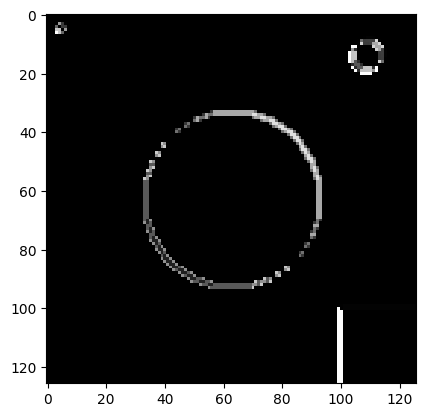

In [14]:
filter = np.array([[0,1,2],[-1,0,1],[-2,-1,-0]], dtype=np.uint8)

filtered_data = apply_filter(copy(data), filter, 1)

plt.imshow(filtered_data, interpolation='nearest')
plt.show()

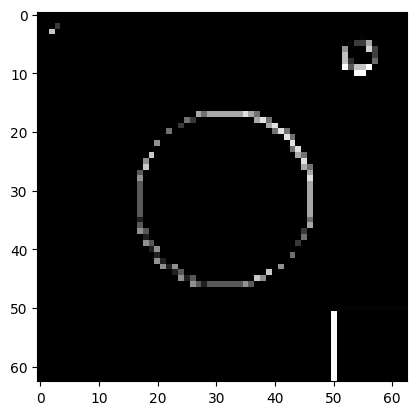

In [15]:
filter = np.array([[0,1,2],[-1,0,1],[-2,-1,-0]], dtype=np.uint8)

filtered_data = apply_filter(copy(data), filter, 2)

plt.imshow(filtered_data, interpolation='nearest')
plt.show()